In [42]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [43]:
# Reading the saved data pickle file
df_stocks = pd.read_pickle('DataGathered/ProcesssedData/pickled_ten_year_filtered_lead_para_GSPC.pkl')

In [44]:
df_stocks

,close,adj close,articles
2007-01-01,1417.280005,2.728776e+09,. Estimates of Iraqi Civilian Deaths. Romania ...
2007-01-02,1416.939991,3.078968e+09,". For Dodd, Wall Street Looms Large. Ford's Lo..."
2007-01-03,1416.599976,3.429160e+09,". Ethics Changes Proposed for House Trips, K S..."
2007-01-04,1418.339966,3.004460e+09,. I Feel Bad About My Face. Bush Recycles the ...
2007-01-05,1409.709961,2.919400e+09,. Macworld Bingo. Anti-Surge Protests Against ...
2007-01-06,1410.753296,2.867380e+09,. In da Car at Dakar. The Macworld-C.E.S. Conf...
2007-01-07,1411.796631,2.815360e+09,. BitTorrent Comes to the Television. LG&#8217...
2007-01-08,1412.839966,2.763340e+09,. That R2 Unit Is a Real Bargain. HDTV Heavy. ...
2007-01-09,1412.109985,3.038380e+09,. The iPhone Rumors Are Right&#8230;Finally. P...
2007-01-10,1414.849976,2.764660e+09,. A Ride in a Gaming Chair. More iPhone Fun Fa...


In [45]:
df_stocks['prices'] = df_stocks['adj close'].apply(np.int64)

In [46]:
# selecting the prices and articles
df_stocks = df_stocks[['prices', 'articles']]

In [47]:
df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_stocks

,prices,articles
2007-01-01,2728776000,Estimates of Iraqi Civilian Deaths. Romania a...
2007-01-02,3078968000,"For Dodd, Wall Street Looms Large. Ford's Los..."
2007-01-03,3429160000,"Ethics Changes Proposed for House Trips, K St..."
2007-01-04,3004460000,I Feel Bad About My Face. Bush Recycles the T...
2007-01-05,2919400000,Macworld Bingo. Anti-Surge Protests Against M...
2007-01-06,2867380000,In da Car at Dakar. The Macworld-C.E.S. Confl...
2007-01-07,2815360000,BitTorrent Comes to the Television. LG&#8217;...
2007-01-08,2763340000,That R2 Unit Is a Real Bargain. HDTV Heavy. L...
2007-01-09,3038380000,The iPhone Rumors Are Right&#8230;Finally. Pr...
2007-01-10,2764660000,A Ride in a Gaming Chair. More iPhone Fun Fac...


In [49]:
df = df_stocks[['prices']].copy()
df

,prices
2007-01-01,2728776000
2007-01-02,3078968000
2007-01-03,3429160000
2007-01-04,3004460000
2007-01-05,2919400000
2007-01-06,2867380000
2007-01-07,2815360000
2007-01-08,2763340000
2007-01-09,3038380000
2007-01-10,2764660000


In [50]:
# Adding new columns to the data frame
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [51]:
df

,prices,compound,neg,neu,pos
2007-01-01,2728776000,,,,
2007-01-02,3078968000,,,,
2007-01-03,3429160000,,,,
2007-01-04,3004460000,,,,
2007-01-05,2919400000,,,,
2007-01-06,2867380000,,,,
2007-01-07,2815360000,,,,
2007-01-08,2763340000,,,,
2007-01-09,3038380000,,,,
2007-01-10,2764660000,,,,


In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sid = SentimentIntensityAnalyzer()
for date, row in df_stocks.T.iteritems():
    try:
        sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'articles'])
        ss = sid.polarity_scores(sentence)
        df.set_value(date, 'compound', ss['compound'])
        df.set_value(date, 'neg', ss['neg'])
        df.set_value(date, 'neu', ss['neu'])
        df.set_value(date, 'pos', ss['pos'])
    except TypeError:
        print (df_stocks.loc[date, 'articles'])
        print (date)

In [53]:
# sentence = 'paris shootout police officer suspected guman dead'
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import unicodedata
# sid = SentimentIntensityAnalyzer()
# ss = sid.polarity_scores(sentence)
# ss

In [54]:
# Checking date for empty strings
# for date, row in df_stocks.T.iteritems():
#     if type(df_stocks.loc[date, 'articles']).__name__ == 'str':
#         print date

In [55]:
df

,prices,compound,neg,neu,pos
2007-01-01,2728776000,-0.9881,0.176,0.723,0.102
2007-01-02,3078968000,-0.397,0.117,0.778,0.105
2007-01-03,3429160000,-0.9994,0.196,0.749,0.055
2007-01-04,3004460000,-0.9975,0.112,0.835,0.053
2007-01-05,2919400000,-0.9882,0.118,0.8,0.082
2007-01-06,2867380000,-0.9668,0.124,0.785,0.091
2007-01-07,2815360000,-0.9957,0.162,0.772,0.066
2007-01-08,2763340000,-0.8171,0.083,0.839,0.078
2007-01-09,3038380000,-0.9932,0.091,0.864,0.046
2007-01-10,2764660000,0.7728,0.095,0.804,0.101


In [56]:
train_start_date = '2007-01-01'
train_end_date = '2014-12-31'
test_start_date = '2015-01-01'
test_end_date = '2016-12-31'
train = df.ix[train_start_date : train_end_date]
test = df.ix[test_start_date:test_end_date]

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [57]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [58]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [59]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

In [60]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [61]:
print (rf.feature_importances_)

[ 0.51803803  0.48196197]


In [62]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [63]:
prediction

array([  3.72739617e+09,   3.93601600e+09,   4.22964225e+09,
         4.21993967e+09,   4.10898067e+09,   3.84254017e+09,
         3.07384200e+09,   4.54672833e+09,   3.77493008e+09,
         3.97195200e+09,   6.07493587e+09,   4.19237483e+09,
         3.01974500e+09,   3.87923470e+09,   3.56527246e+09,
         4.57862300e+09,   4.33628300e+09,   3.37896500e+09,
         3.93779380e+09,   4.61814500e+09,   6.67949508e+09,
         3.43480689e+09,   4.22120233e+09,   3.59070400e+09,
         3.84926525e+09,   4.24269333e+09,   4.61982133e+09,
         3.46202800e+09,   3.27230833e+09,   4.23270033e+09,
         3.77928767e+09,   4.90047900e+09,   3.88252294e+09,
         3.22653700e+09,   3.83548695e+09,   3.98396525e+09,
         2.59529900e+09,   4.07991933e+09,   4.36290800e+09,
         3.23791600e+09,   3.96922475e+09,   5.30009033e+09,
         3.61542700e+09,   4.43471700e+09,   5.10533067e+09,
         3.66002267e+09,   4.58697633e+09,   4.90430967e+09,
         4.45078733e+09,

In [64]:
contributions

array([[ -2.12790603e+08,  -1.12584756e+08],
       [ -9.33900011e+07,  -2.33655241e+07],
       [  2.18229138e+08,  -4.13584129e+07],
       ..., 
       [  4.60465055e+08,  -4.08546580e+08],
       [ -5.83350168e+08,  -2.66487690e+08],
       [  1.08279559e+09,  -4.80664450e+08]])

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
idx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

In [67]:
predictions_df

,prices
2015-01-01,3.727396e+09
2015-01-02,3.936016e+09
2015-01-03,4.229642e+09
2015-01-04,4.219940e+09
2015-01-05,4.108981e+09
2015-01-06,3.842540e+09
2015-01-07,3.073842e+09
2015-01-08,4.546728e+09
2015-01-09,3.774930e+09
2015-01-10,3.971952e+09


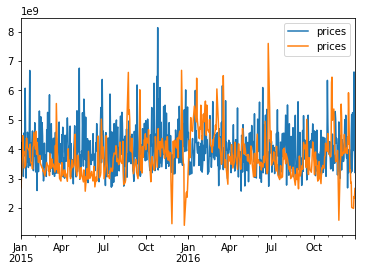

In [68]:
#predictions_df.plot() 
#test['prices'].plot()

predictions_plot = predictions_df.plot()

fig = y_test.plot(ax = predictions_plot).get_figure()

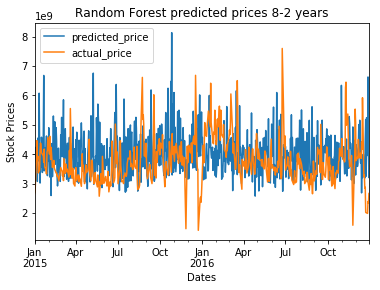

In [69]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
# colors = ['332288', '88CCEE', '44AA99', '117733', '999933', 'DDCC77', 'CC6677', '882255', 'AA4499']

In [70]:
test

,prices,compound,neg,neu,pos
2015-01-01,2657385000,-0.9135,0.143,0.728,0.129
2015-01-02,2708700000,-0.9775,0.149,0.759,0.093
2015-01-03,3072173333,-0.9718,0.119,0.811,0.071
2015-01-04,3435646666,-0.9971,0.22,0.716,0.064
2015-01-05,3799120000,-0.9901,0.156,0.766,0.078
2015-01-06,4460110000,-0.9977,0.145,0.795,0.06
2015-01-07,3805480000,-0.9965,0.148,0.788,0.064
2015-01-08,3934010000,-0.9991,0.185,0.732,0.083
2015-01-09,3364140000,-0.9951,0.126,0.823,0.051
2015-01-10,3394913333,-0.998,0.199,0.75,0.051


# Increasing the prices by a constant value so that it represents closing price during the testing

In [71]:
from datetime import datetime, timedelta

temp_date = test_start_date
average_last_5_days_test = 0
total_days = 10
for i in range(total_days):
    average_last_5_days_test += test.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Reducing one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    #print temp_date
average_last_5_days_test = average_last_5_days_test / total_days
print (average_last_5_days_test)

temp_date = test_start_date
average_upcoming_5_days_predicted = 0
for i in range(total_days):
    average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Adding one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    print (temp_date)
average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
print (average_upcoming_5_days_predicted)
#average train.loc['2013-12-31', 'prices'] - advpredictions_df.loc['2014-01-01', 'prices']
difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
print (difference_test_predicted_prices)

3463167833.2
2015-01-02
2015-01-03
2015-01-04
2015-01-05
2015-01-06
2015-01-07
2015-01-08
2015-01-09
2015-01-10
2015-01-11
3943196733.17
-480028899.97


In [72]:
predictions_df

,prices
2015-01-01,3.727396e+09
2015-01-02,3.936016e+09
2015-01-03,4.229642e+09
2015-01-04,4.219940e+09
2015-01-05,4.108981e+09
2015-01-06,3.842540e+09
2015-01-07,3.073842e+09
2015-01-08,4.546728e+09
2015-01-09,3.774930e+09
2015-01-10,3.971952e+09


In [73]:
# Adding 6177 to all the advpredictions_df price values
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices
predictions_df

,prices
2015-01-01,3.247367e+09
2015-01-02,3.455987e+09
2015-01-03,3.749613e+09
2015-01-04,3.739911e+09
2015-01-05,3.628952e+09
2015-01-06,3.362511e+09
2015-01-07,2.593813e+09
2015-01-08,4.066699e+09
2015-01-09,3.294901e+09
2015-01-10,3.491923e+09


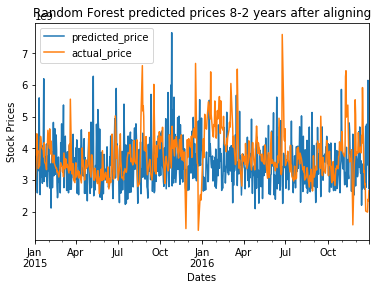

In [74]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years after aligning')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()

# Smoothing the time series data

# Applying EWMA pandas to smooth the stock prices

In [85]:
predictions_df

,predicted_price,average_predicted_price,actual_price,average_actual_price
2015-01-01,3.247367e+09,3.247367e+09,2657385000,2.657385e+09
2015-01-02,3.455987e+09,3.353416e+09,2708700000,2.683470e+09
2015-01-03,3.749613e+09,3.489908e+09,3072173333,2.817380e+09
2015-01-04,3.739911e+09,3.555568e+09,3435646666,2.979760e+09
2015-01-05,3.628952e+09,3.571239e+09,3799120000,3.154736e+09
2015-01-06,3.362511e+09,3.533489e+09,4460110000,3.390824e+09
2015-01-07,2.593813e+09,3.385459e+09,3805480000,3.456146e+09
2015-01-08,4.066699e+09,3.480874e+09,3934010000,3.523076e+09
2015-01-09,3.294901e+09,3.457350e+09,3364140000,3.502972e+09
2015-01-10,3.491923e+09,3.461349e+09,3394913333,3.490474e+09


In [86]:
predictions_df['ewma'] = pd.ewma(predictions_df["prices"], span=60, freq="D")

KeyError: 'prices'

In [87]:
predictions_df

,predicted_price,average_predicted_price,actual_price,average_actual_price
2015-01-01,3.247367e+09,3.247367e+09,2657385000,2.657385e+09
2015-01-02,3.455987e+09,3.353416e+09,2708700000,2.683470e+09
2015-01-03,3.749613e+09,3.489908e+09,3072173333,2.817380e+09
2015-01-04,3.739911e+09,3.555568e+09,3435646666,2.979760e+09
2015-01-05,3.628952e+09,3.571239e+09,3799120000,3.154736e+09
2015-01-06,3.362511e+09,3.533489e+09,4460110000,3.390824e+09
2015-01-07,2.593813e+09,3.385459e+09,3805480000,3.456146e+09
2015-01-08,4.066699e+09,3.480874e+09,3934010000,3.523076e+09
2015-01-09,3.294901e+09,3.457350e+09,3364140000,3.502972e+09
2015-01-10,3.491923e+09,3.461349e+09,3394913333,3.490474e+09


In [88]:
predictions_df['actual_value'] = test['prices']
predictions_df['actual_value_ewma'] = pd.ewma(predictions_df["actual_value"], span=60, freq="D")

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=60,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  


In [89]:
predictions_df

,predicted_price,average_predicted_price,actual_price,average_actual_price,actual_value,actual_value_ewma
2015-01-01,3.247367e+09,3.247367e+09,2657385000,2.657385e+09,NaN,NaN
2015-01-02,3.455987e+09,3.353416e+09,2708700000,2.683470e+09,NaN,NaN
2015-01-03,3.749613e+09,3.489908e+09,3072173333,2.817380e+09,NaN,NaN
2015-01-04,3.739911e+09,3.555568e+09,3435646666,2.979760e+09,NaN,NaN
2015-01-05,3.628952e+09,3.571239e+09,3799120000,3.154736e+09,NaN,NaN
2015-01-06,3.362511e+09,3.533489e+09,4460110000,3.390824e+09,NaN,NaN
2015-01-07,2.593813e+09,3.385459e+09,3805480000,3.456146e+09,NaN,NaN
2015-01-08,4.066699e+09,3.480874e+09,3934010000,3.523076e+09,NaN,NaN
2015-01-09,3.294901e+09,3.457350e+09,3364140000,3.502972e+09,NaN,NaN
2015-01-10,3.491923e+09,3.461349e+09,3394913333,3.490474e+09,NaN,NaN


In [90]:
# Changing column names
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

ValueError: Length mismatch: Expected axis has 6 elements, new values have 4 elements

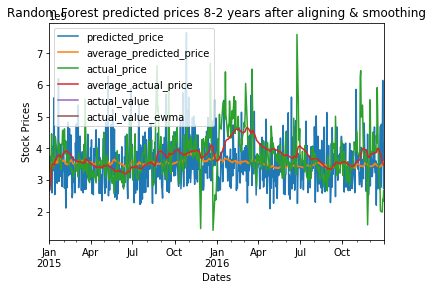

In [91]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest predicted prices 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()

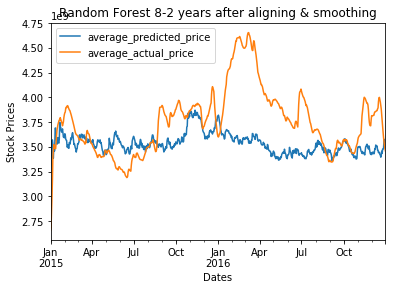

In [92]:
# Plotting just predict and actual average curves
predictions_df_average = predictions_df[['average_predicted_price', 'average_actual_price']]
predictions_plot = predictions_df_average.plot(title='Random Forest 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()

# Increasing the prices by a constant value so that it represents closing price during the testing

In [93]:
def offset_value(test_start_date, test, predictions_df):
    temp_date = test_start_date
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 10
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

# LogisticRegression

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()


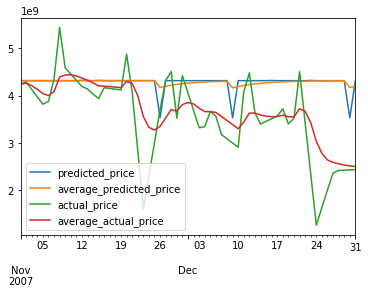

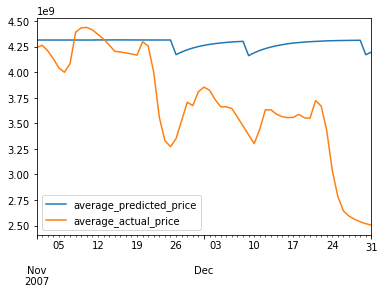

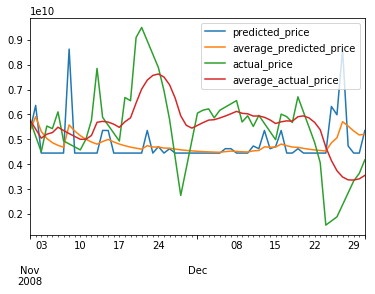

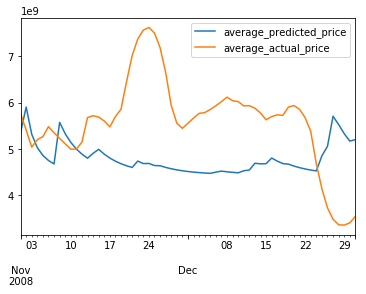

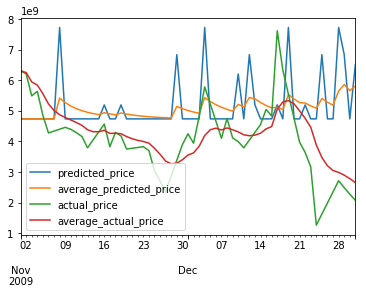

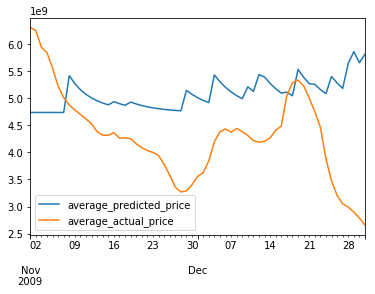

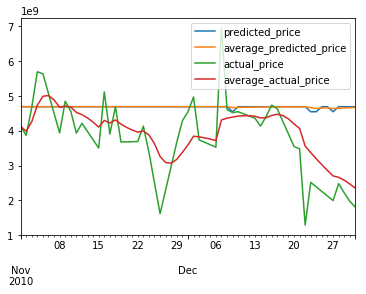

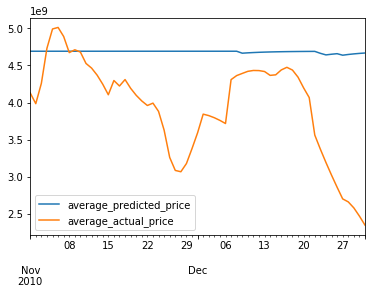

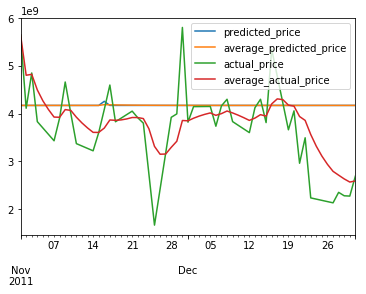

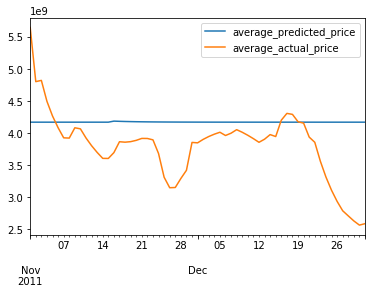

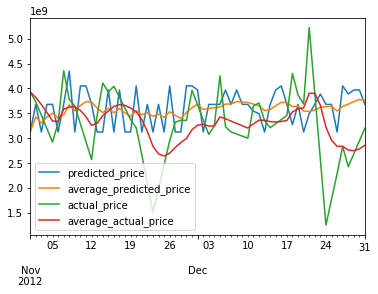

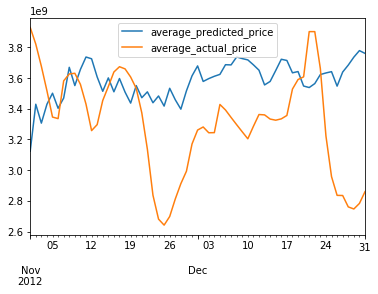

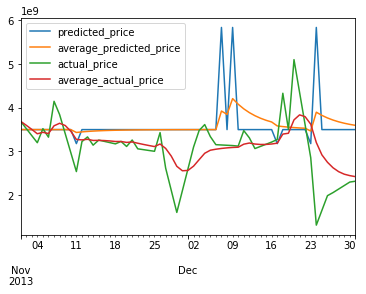

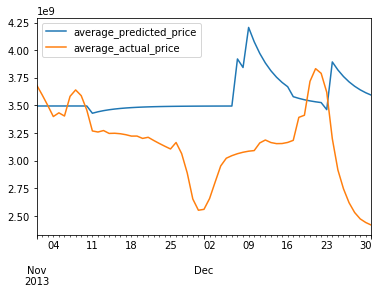

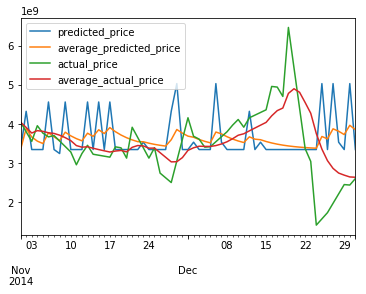

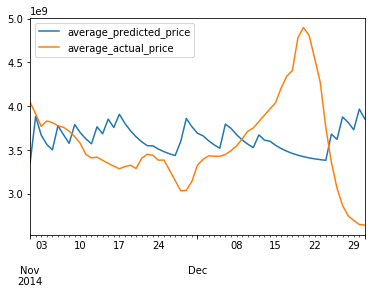

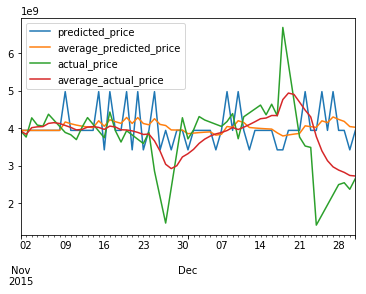

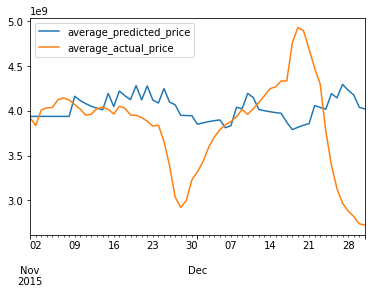

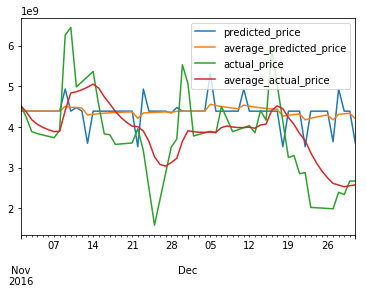

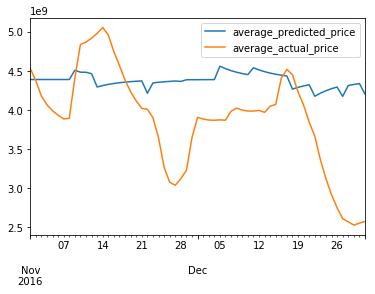

In [94]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    lr = LogisticRegression()
    lr.fit(numpy_df_train, train['prices'])
    

    prediction = lr.predict(numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=10, freq="D")
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=10, freq="D")
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()
    

In [95]:
lr.classes_

array([2654780000, 2777550000, 2809090000, 2830390000, 2879966666,
       2883966666, 2916550000, 2958747500, 2962976666, 2968340000,
       2969310000, 2977100000, 2982383333, 3000660000, 3006800000,
       3009310000, 3023280000, 3026616666, 3034600000, 3041490000,
       3045920000, 3047073333, 3052573333, 3055480000, 3057240000,
       3067717500, 3078530000, 3079150000, 3084800000, 3084836666,
       3091120000, 3095563333, 3108405000, 3113153333, 3122600000,
       3137550000, 3140730000, 3148280000, 3150996666, 3163000000,
       3168160000, 3170000000, 3180252500, 3196400000, 3206203333,
       3211860000, 3216170000, 3228150000, 3230990000, 3232880000,
       3249843333, 3253340000, 3254950000, 3258062500, 3269385000,
       3283516666, 3290320000, 3297940000, 3300570000, 3316880000,
       3317190000, 3319420000, 3319740000, 3327550000, 3334300000,
       3337170000, 3342340000, 3356926666, 3357320000, 3358517500,
       3359530000, 3362670000, 3371393333, 3373720000, 3376600

In [96]:
lr.coef_[0]

array([ 0.80968191, -0.27906471, -1.8828048 , -0.24508569])

# RandomForestRegressor

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False)

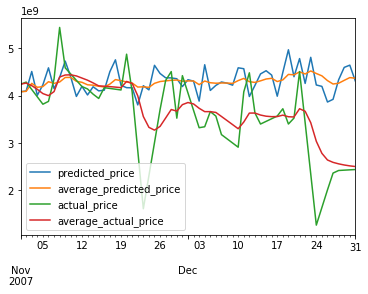

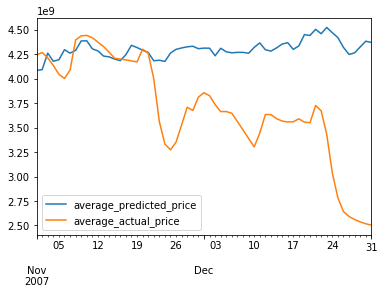

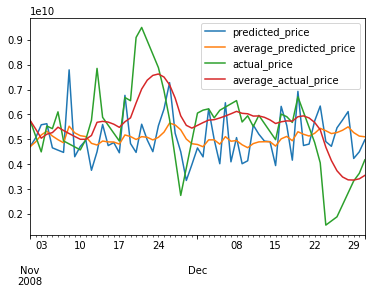

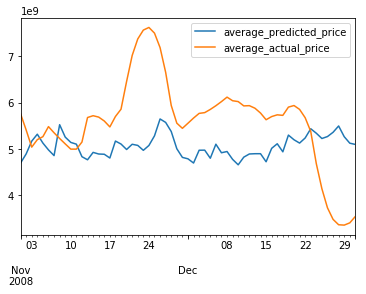

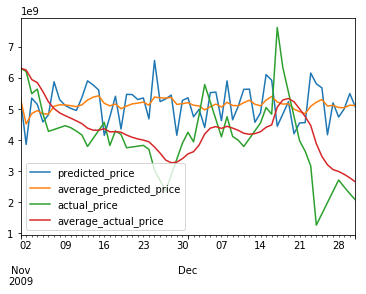

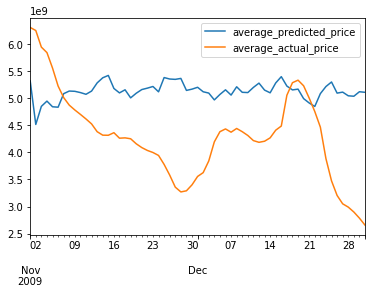

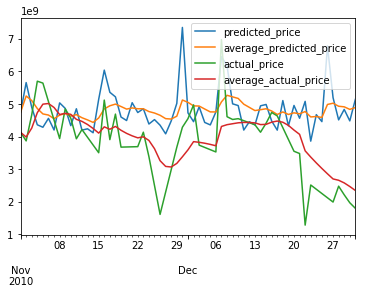

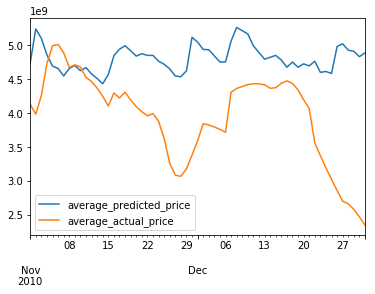

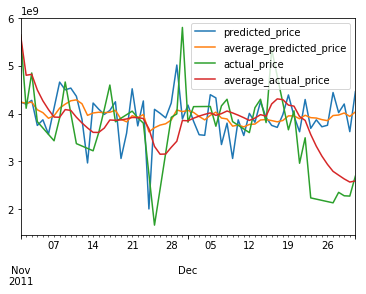

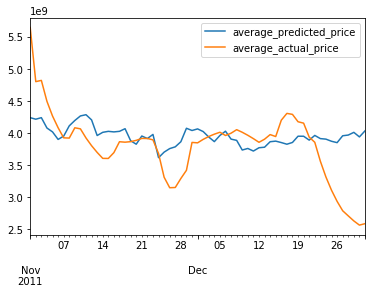

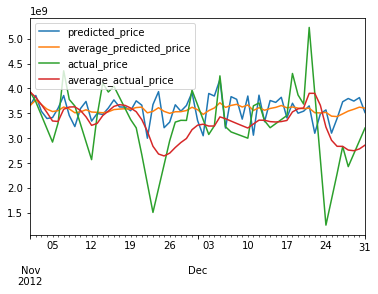

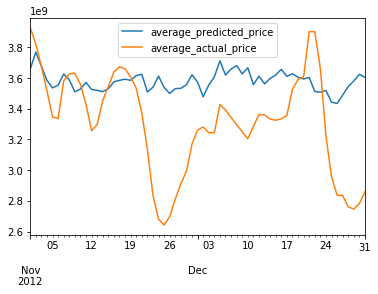

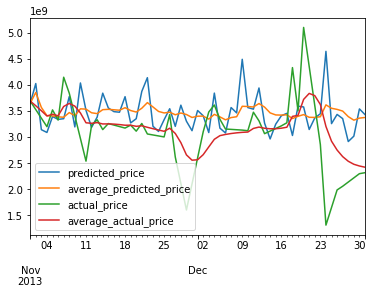

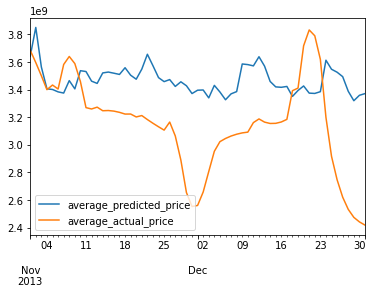

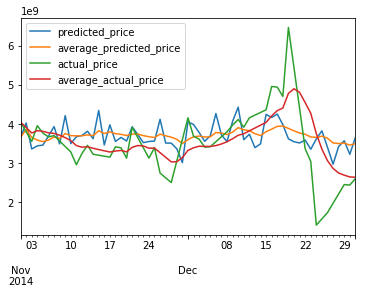

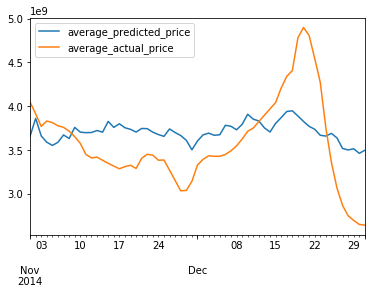

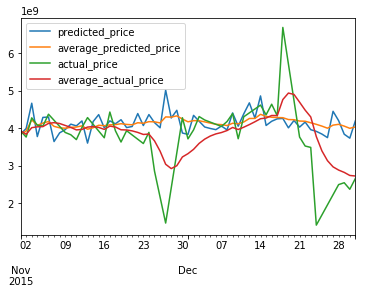

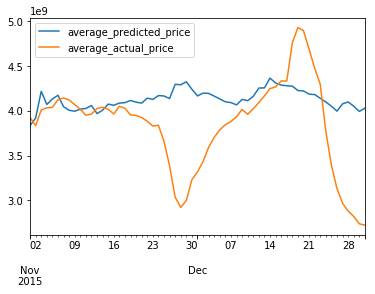

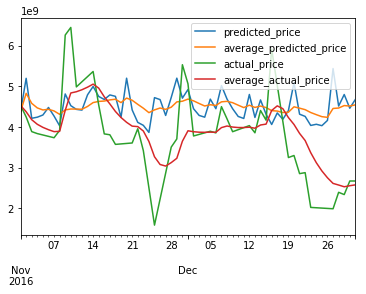

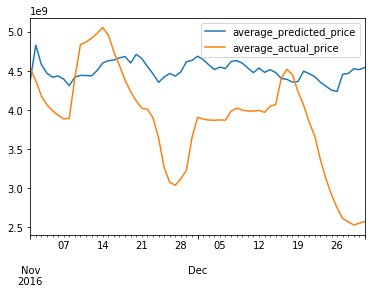

In [98]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    rf = RandomForestRegressor(random_state=665)
    rf.fit(numpy_df_train, train['prices'])
    #print rf
    
    prediction, bias, contributions = ti.predict(rf, numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=10, freq="D")
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=10, freq="D")
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()
    

In [99]:
# from IPython.display import Image  
# dot_data = tree.export_graphviz(rf, out_file=None, 
#                      feature_names=['comp', 'neg', 'neu', 'pos'],  
#                      class_names=iris.target_names,  
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
# Image(graph.create_png())

# MLP Classifier

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=20,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=20,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()


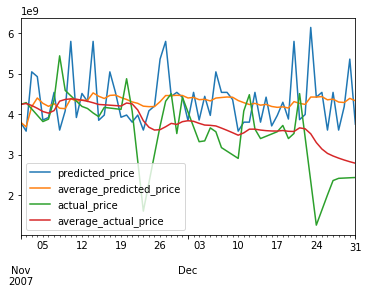

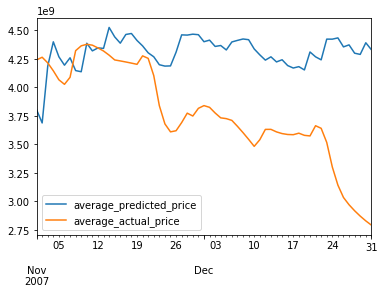

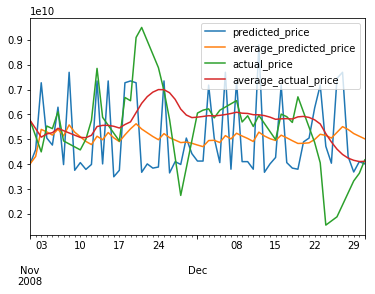

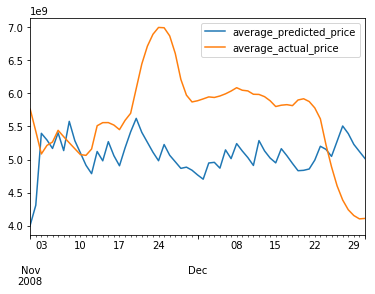

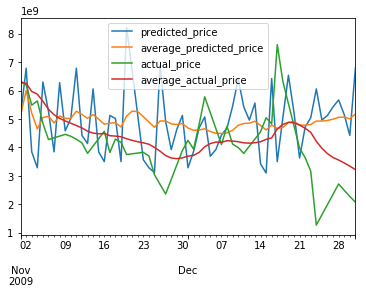

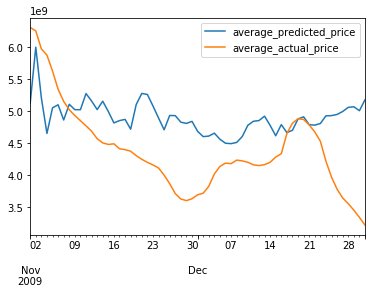

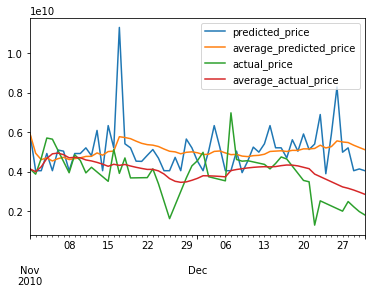

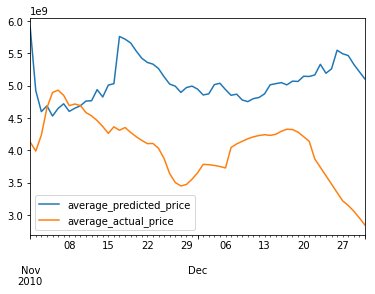

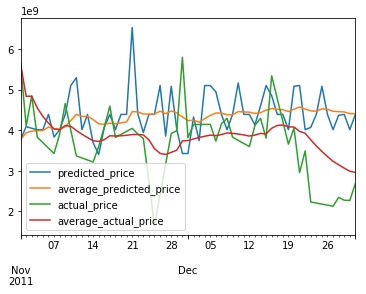

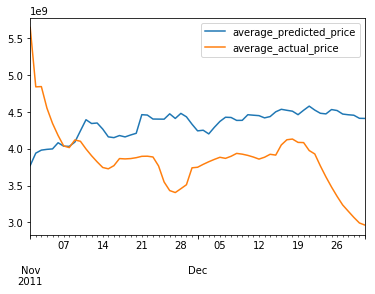

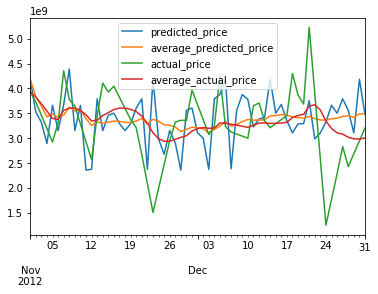

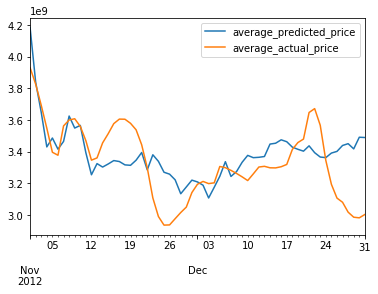

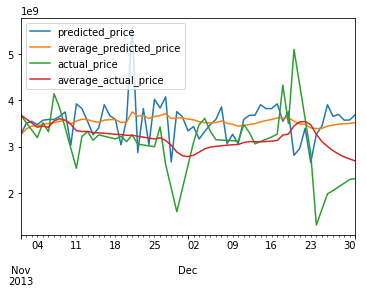

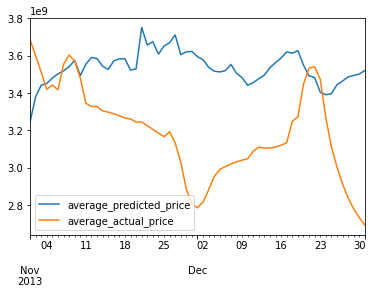

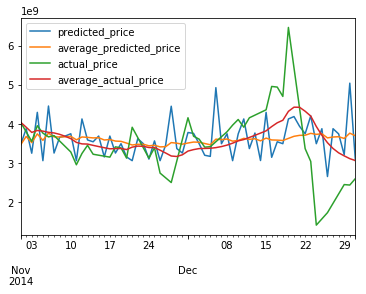

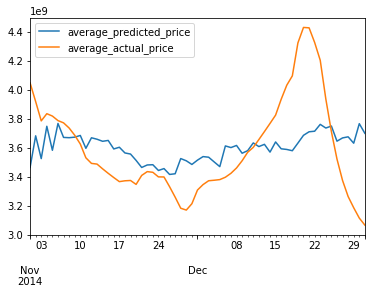

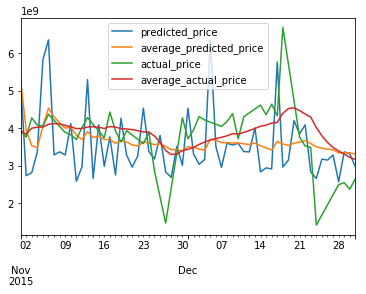

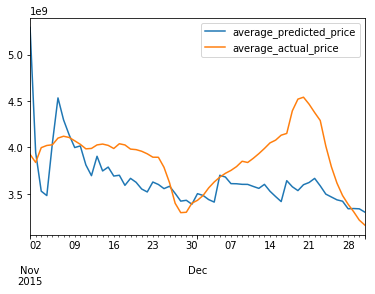

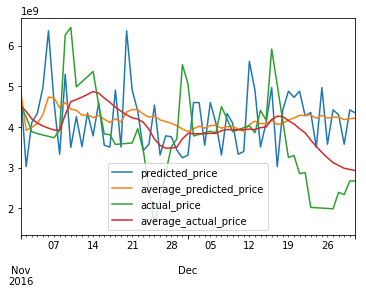

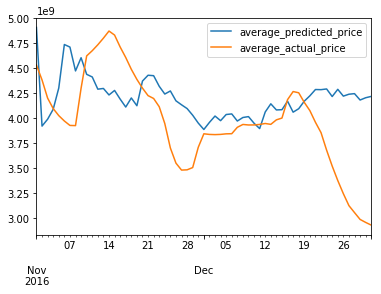

In [100]:
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
    mlpc.fit(numpy_df_train, train['prices'])   
    prediction = mlpc.predict(numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=20, freq="D")
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=20, freq="D")
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()



import pickle
filename = 'finalized_model_GSPC.sav'
pickle.dump(mlpc, open(filename, 'wb'))


   

In [101]:
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='tanh', 
                         solver='lbfgs', alpha=0.010, learning_rate_init = 0.001, shuffle=False)
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.010, learning_rate_init = 0.001, shuffle=False) # span = 20
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 50), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)

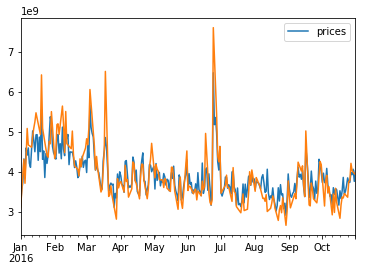

In [102]:
# checking the performance of training data itself
prediction, bias, contributions = ti.predict(rf, numpy_df_train)
idx = pd.date_range(train_start_date, train_end_date)
predictions_df1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
predictions_df1.plot() 
train['prices'].plot()

In [103]:
#import pickle
#filename = 'finalized_model.sav'
#pickle.dump(mlpc, open(filename, 'wb'))


In [104]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test,)
print(result)

TypeError: score() missing 1 required positional argument: 'y'